## Import Libraries

In [1]:
import pandas as pd
#Import Libraries
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from scipy.signal import find_peaks
from sklearn.preprocessing import LabelEncoder
import os
import numpy as np

## Prepare Data

### Soothe Healthcare

In [182]:
# folder = '../Data/Soothe Healthcare/'
# df_factsales = pd.read_csv(os.path.join(folder, 'Sales Full.csv'), encoding='latin-1')

In [183]:
# date_column = 'Invoice date'
# predict_column = 'Total Invoice Value'

# df_sales = df_factsales.copy()
# df_sales[date_column] = pd.to_datetime(df_sales[date_column], dayfirst = True)

# df_sales.drop(['PCS Qty', 'PKT Qty', 'Item Description'], axis = 1, inplace = True)

In [184]:
# state_data = {
#     'State': ['CG', 'UP', 'HR', 'TN', 'UK', 'RJ', 'DL', 'WB', 'BR', 'KA', 'MP', 'TS', 'AR', 'AP', 'KL', 'AS', 'MH', 'DH', 'ML', 'GJ', 'JK', 'PB', 'HP', 'JH', 'IT', 'OR', 'NL', 'AD', 'TR', 'AN', 'CH', 'MN', 'KM', 'CM'],
#     'Population': [30.64, 238.9, 30.69, 77.17, 11.80, 81.03, 21.88, 99.61, 129.00, 70.00, 87.00, 38.32, 1.57, 54.00, 35.97, 36.00, 123.00, 1.39, 3.37, 72.65, 13.60, 30.99, 7.52, 38.00, 1.38, 46.00, 2.28, 1.38, 4.00, 0.43, 1.25, 3.00, 2.72, 1.50],
#     'Average High Temp': [30, 32, 34, 35, 28, 36, 37, 33, 31, 29, 32, 34, 25, 33, 28, 27, 34, 30, 26, 35, 24, 33, 22, 31, 23, 32, 24, 28, 30, 29, 27, 25, 26, 28],
#     'Average Low Temp': [18, 20, 22, 23, 15, 24, 25, 21, 19, 18, 20, 22, 14, 21, 17, 16, 22, 18, 14, 23, 12, 21, 10, 19, 11, 20, 12, 16, 18, 17, 15, 13, 14, 16],
#     'Rainfall': [120, 150, 100, 200, 180, 90, 80, 160, 140, 130, 110, 100, 220, 170, 200, 210, 100, 120, 230, 90, 250, 140, 260, 130, 240, 150, 250, 200, 180, 170, 160, 230, 220, 210]
# }

# df_state = pd.DataFrame(state_data)

# data = {
#     'Month name': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
#     'Month':[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
#     'Money Supply M0': [42500, 43000, 43500, 44000, 44500, 45000, 45500, 46000, 46500, 47000, 47500, 48000],
#     'Money Supply M1': [68000, 68500, 69000, 69500, 70000, 70500, 71000, 71500, 72000, 72500, 73000, 73500],
#     'Inflation Rate': [6.52, 6.44, 5.66, 4.70, 4.25, 4.81, 7.44, 6.83, 6.02, 5.36, 4.91, 4.59],
# }

# df_metrics = pd.DataFrame(data)

# holidays_list = [
#     "2023-01-01",
#     "2023-01-26",
#     "2023-03-08",
#     "2023-04-07",
#     "2023-04-14",
#     "2023-04-22",
#     "2023-05-01",
#     "2023-05-05",
#     "2023-06-29",
#     "2023-08-15",
#     "2023-09-28",
#     "2023-10-02",
#     "2023-10-24",
#     "2023-11-12",
#     "2023-12-25"
# ]

In [185]:
# df_sales = pd.merge(df_sales, df_state, left_on = 'State', right_on = 'State')
# df_sales['Month'] = df_sales['Invoice date'].dt.month
# df_sales = pd.merge(df_sales, df_metrics, left_on = 'Month', right_on = 'Month')

## Prepare Synthetic

In [79]:
folder = '../Data/Synthetic/'
df_sales = pd.read_excel(os.path.join(folder, 'Sales.xlsx'))

In [80]:
folder = '../Data/Contoso/'
df_dimproductcatg = pd.read_csv(os.path.join(folder, 'DimProductCategory.csv'))
df_dimproductcatg.columns = df_dimproductcatg.columns.str.upper()
product_category = list(df_dimproductcatg['PRODUCTCATEGORYNAME'])

df_sales_final = pd.DataFrame()
for category in product_category:
    df_sales['Product Category'] = category
    if df_sales_final.shape[0] == 0:
        df_sales_final = df_sales.copy()
    else:
        df_sales_final = pd.concat([df_sales_final, df_sales], axis = 0)

In [81]:
category = ['Audio', 'Cameras and camcorders ', 'Cell phones', 'Computers',
       'Games and Toys', 'Home Appliances', 'Music, Movies and Audio Books',
       'TV and Video']
sales_qty = [12, 12, 32, 12, 57, 11, 11, 11]

for i in range(len(category)):
    df_sales_final.loc[(df_sales_final['Product Category'] == category[i]), 'Sales Quantity Average'] = sales_qty[i]

In [468]:
dates = pd.date_range(start="2022-01-01", end="2023-12-31")

# Create a DataFrame to hold the final data
df_sales_final_all_days = pd.DataFrame()

# Repeat the data for each date
for date in dates:
    monthly_data = df_sales_final[df_sales_final['Month'] == date.month].copy()
    monthly_data["Date"] = date
    df_sales_final_all_days = pd.concat([df_sales_final_all_days, monthly_data])

# Reset index
df_sales_final_all_days.reset_index(drop=True, inplace=True)
df_sales_final_all_days['Year'] = df_sales_final_all_days['Date'].dt.year
df_sales_final_all_days['Day'] = df_sales_final_all_days['Date'].dt.day
df_sales_final_all_days['DayOfWeek'] = df_sales_final_all_days['Date'].dt.dayofweek
df_sales_final_all_days['Weekend'] = df_sales_final_all_days['Date'].dt.dayofweek // 5

In [739]:
df = df_sales_final_all_days.copy()

In [740]:
df['Sales Quantity'] = ((df['Population'] * ((df['Average High Temp'] + df['Average Low Temp'])/2) * df['Rainfall'] ) / (df['Inflation Rate'] * df['Money Supply M0']/100))/df['Sales Quantity Average']
df['Sales Quantity'] = ((df['Sales Quantity'] * df['DayOfWeek']) + (df['Month'] % 3) - (df['Day']/2) + (df['Weekend'] * 3)) * (df['Year'] - 2020)
df['Sales Quantity'] = df['Sales Quantity'] - (df['Sales Quantity'].min()) + 1
import random
random_values = [random.uniform(5, 15) for _ in range(df.shape[0])]
df['Sales Quantity'] = df['Sales Quantity'] + random_values
df['Sales Quantity'] = df['Sales Quantity'].astype(int) + 1

In [741]:
# df[['Month', 'Day', 'Date', 'DayOfWeek', 'Sales Quantity', 'Sales Quantity']]

In [742]:
df_plot = df.groupby('Date')[['Sales Quantity']].sum()

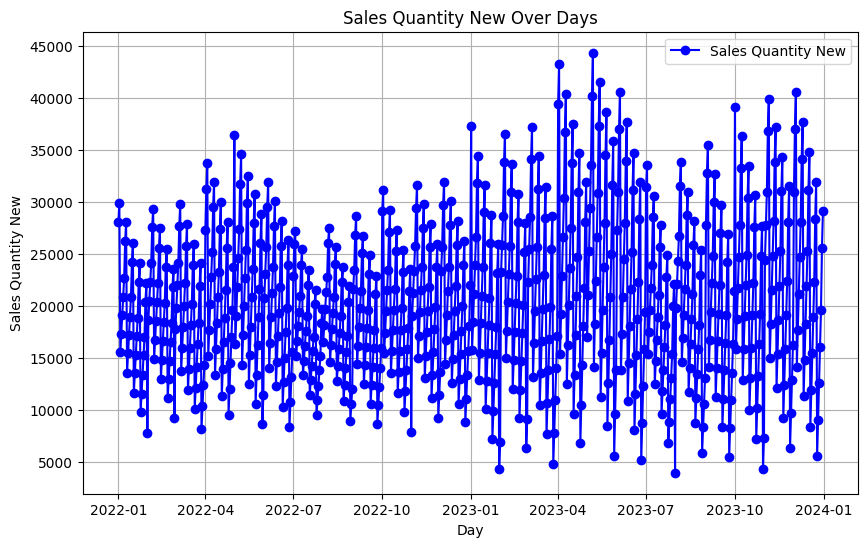

In [743]:
plt.figure(figsize=(10, 6))
plt.plot(df_plot.index, df_plot['Sales Quantity'], marker='o', linestyle='-', color='b', label='Sales Quantity New')
plt.xlabel('Day')
plt.ylabel('Sales Quantity New')
plt.title('Sales Quantity New Over Days')
plt.legend()
plt.grid(True)
plt.show()

In [744]:
import pandas as pd

data = {
    'Product Category': [
        'Audio', 'Cameras and Camcorders', 'Cell Phones', 'Computers', 
        'Games and Toys', 'Home Appliances', 'Music, Movies and Audio Books', 'TV and Video',
        'Audio', 'Cameras and Camcorders', 'Cell Phones', 'Computers', 
        'Games and Toys', 'Home Appliances', 'Music, Movies and Audio Books', 'TV and Video'
    ] * 2,
    'Promotion Type': [
        'Festive Sale', 'Festive Sale', 'Festive Sale', 'Festive Sale',
        'Festive Sale', 'Festive Sale', 'Festive Sale', 'Festive Sale',
        'End of Season Sale', 'End of Season Sale', 'End of Season Sale', 'End of Season Sale',
        'End of Season Sale', 'End of Season Sale', 'End of Season Sale', 'End of Season Sale'
    ] * 2,
    'Start Date': [
        '2023-09-25', '2023-09-25', '2023-09-25', '2023-09-25',
        '2023-09-25', '2023-09-25', '2023-09-25', '2023-09-25',
        '2023-01-05', '2023-01-05', '2023-01-05', '2023-01-05',
        '2023-06-05', '2023-06-05', '2023-06-05', '2023-06-05',
        '2022-09-25', '2022-09-25', '2022-09-25', '2022-09-25',
        '2022-09-25', '2022-09-25', '2022-09-25', '2022-09-25',
        '2022-01-05', '2022-01-05', '2022-01-05', '2022-01-05',
        '2022-06-05', '2022-06-05', '2022-06-05', '2022-06-05'
    ],
    'End Date': [
        '2023-11-05', '2023-11-05', '2023-11-05', '2023-11-05',
        '2023-11-05', '2023-11-05', '2023-11-05', '2023-11-05',
        '2023-02-05', '2023-02-05', '2023-02-05', '2023-02-05',
        '2023-07-15', '2023-07-15', '2023-07-15', '2023-07-15',
        '2022-11-05', '2022-11-05', '2022-11-05', '2022-11-05',
        '2022-11-05', '2022-11-05', '2022-11-05', '2022-11-05',
        '2022-02-05', '2022-02-05', '2022-02-05', '2022-02-05',
        '2022-07-15', '2022-07-15', '2022-07-15', '2022-07-15'
    ]
}

# Creating the DataFrame
df_promotion = pd.DataFrame(data)

In [745]:
df['Promotion Type'] = 'No Promotion'
for i in range(df_promotion.shape[0]):
    df.loc[(df['Product Category'] == df_promotion['Product Category'][i]) & (df['Date'] >= df_promotion['Start Date'][i]) & (df['Date'] <= df_promotion['End Date'][i]), 'Promotion Type'] = df_promotion['Promotion Type'][i]

In [746]:
df.loc[df['Promotion Type'] == 'No Promotion', 'Sales Quantity'] = df[df['Promotion Type'] == 'No Promotion']['Sales Quantity']
random_values = [random.uniform(0, 0.5) for _ in range(df.loc[df['Promotion Type'] == 'End of Season Sale'].shape[0])]
modified_random_values = [x + 2 for x in random_values]
df.loc[df['Promotion Type'] == 'End of Season Sale', 'Sales Quantity'] = df[df['Promotion Type'] == 'End of Season Sale']['Sales Quantity'] * modified_random_values

random_values = [random.uniform(0.1, 0.7) for _ in range(df.loc[df['Promotion Type'] == 'Festive Sale'].shape[0])]
modified_random_values = [x + 3 for x in random_values]
df.loc[df['Promotion Type'] == 'Festive Sale', 'Sales Quantity'] = df[df['Promotion Type'] == 'Festive Sale']['Sales Quantity'] * modified_random_values

C:\Users\venkatasalam\AppData\Local\Temp\ipykernel_3624\3215590126.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[131.1486931  131.17037629 117.37198891 ... 447.59901237 483.96192754
 966.92839245]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df['Promotion Type'] == 'End of Season Sale', 'Sales Quantity'] = df[df['Promotion Type'] == 'End of Season Sale']['Sales Quantity'] * modified_random_values


In [747]:
df.to_csv(os.path.join(folder, 'Sales.csv'), index = False)

## Read Synthetic

In [748]:
folder = '../Data/Synthetic/'
df_factsales = pd.read_csv(os.path.join(folder, 'Sales.csv'))
df_factsales[date_column] = pd.to_datetime(df_factsales[date_column])
date_column = 'Date'
predict_column = 'Sales Quantity'
catg_columns = ['State', 'Product Category', 'Promotion Type']
aggr_columns = ['State', 'Population', 'Average High Temp', 'Average Low Temp',
       'Rainfall', 'Money Supply M0', 'Money Supply M1',
       'Inflation Rate', 'Product Category', 'Promotion Type', 'Date']

df_sales = df_factsales.copy()

### Timesquare

In [749]:
# folder = '../Data/Timesquare/'
# df_factsales = pd.read_csv(os.path.join(folder, 'Sales.csv'))

## FE

In [750]:
def extract_date_components(df_sales, date_column):
    # Convert 'Invoice date' column to datetime if it's not already
    df_sales.loc[:, date_column] = pd.to_datetime(df_sales[date_column])
    
    # Extract year, quarter, month, week, weekofmonth, day, and is_weekend
    df_sales.loc[:, 'Year'] = df_sales[date_column].dt.year
    df_sales.loc[:, 'Quarter'] = df_sales[date_column].dt.quarter
    df_sales.loc[:, 'Month'] = df_sales[date_column].dt.month
    df_sales.loc[:, 'Week'] = df_sales[date_column].dt.isocalendar().week
    df_sales.loc[:, 'WeekOfMonth'] = df_sales[date_column].dt.day // 7 + 1
    df_sales.loc[:, 'Day'] = df_sales[date_column].dt.day
    df_sales.loc[:, 'Is_Weekend'] = df_sales[date_column].dt.dayofweek // 5
    df_sales.loc[:, 'DayOfWeek'] = df_sales[date_column].dt.dayofweek
    df_sales.loc[:, 'DayOfYear'] = df_sales[date_column].dt.dayofyear
    df_sales['is_start_of_month'] = df_sales[date_column].dt.is_month_start.astype(int)
    df_sales['is_end_of_month'] = df_sales[date_column].dt.is_month_end.astype(int)
    # df_sales['Is_First_Half_Of_Month'] = df_sales['Invoice date'].dt.day <= 10
    # df_sales['Is_Mid_Month'] = (df_sales['Invoice date'].dt.day > 10) & (df_sales['Invoice date'].dt.day <= 20)
    # df_sales['Is_Second_Half_Of_Month'] = df_sales['Invoice date'].dt.day > 20
    

    def get_season(month):
        if 3 <= month <= 5:
            return 1 #'Spring'
        elif 6 <= month <= 8:
            return 2 #'Summer'
        elif 9 <= month <= 11:
            return 3 #'Autumn'
        else:
            return 4 #'Winter'

    df_sales['season'] = df_sales[date_column].dt.month.apply(get_season)
    df_sales.sort_values(by = date_column, ascending = True, inplace = True)
    # df_sales.drop([date_column], axis = 1, inplace = True)

    holidays_list = [
    "2023-01-01",
    "2023-01-26",
    "2023-03-08",
    "2023-04-07",
    "2023-04-14",
    "2023-04-22",
    "2023-05-01",
    "2023-05-05",
    "2023-06-29",
    "2023-08-15",
    "2023-09-28",
    "2023-10-02",
    "2023-10-24",
    "2023-11-12",
    "2023-12-25"]
    df_sales['is_holiday'] = 0
    df_sales.loc[df_sales[date_column].isin(holidays_list), 'is_holiday'] = 1
    
    return df_sales


In [751]:
label_encoders = {}

for col in catg_columns:
    le = LabelEncoder()
    df_sales[col] = le.fit_transform(df_sales[col])
    label_encoders[col] = le

df_sales.sort_values(by = date_column, ascending = True, inplace = True)

In [752]:

# aggr_columns = ['Invoice date']
df_sales_aggr = df_sales.groupby(aggr_columns)[[predict_column]].sum().reset_index()
df_sales_aggr_ml = df_sales_aggr.copy()
df_sales_aggr_ml[date_column] = pd.to_datetime(df_sales_aggr_ml[date_column], dayfirst = True)
df_sales_aggr_ml = extract_date_components(df_sales_aggr_ml, date_column)

C:\Users\venkatasalam\AppData\Local\Temp\ipykernel_3624\2299006587.py:53: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_sales.loc[df_sales[date_column].isin(holidays_list), 'is_holiday'] = 1


## Train Test Split

In [753]:
split_index = int(len(df_sales_aggr_ml) * 0.9)
train_df = df_sales_aggr_ml.iloc[:split_index]
test_df = df_sales_aggr_ml.iloc[split_index:]

# Train RF model
X_train = train_df.drop(columns=[predict_column, date_column])
y_train = train_df[predict_column]
X_test = test_df.drop(columns=[predict_column, date_column])
y_test = test_df[predict_column]

In [754]:
train_df.shape, test_df.shape

((178704, 25), (19856, 25))

## RF Model

In [755]:
random_forest = RandomForestRegressor(10, verbose=2, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
r2_rf = r2_score(y_test, y_pred)
print("R-squared (R2) Score for Random Forest:", r2_rf)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
R-squared (R2) Score for Random Forest: 0.9798215455185847


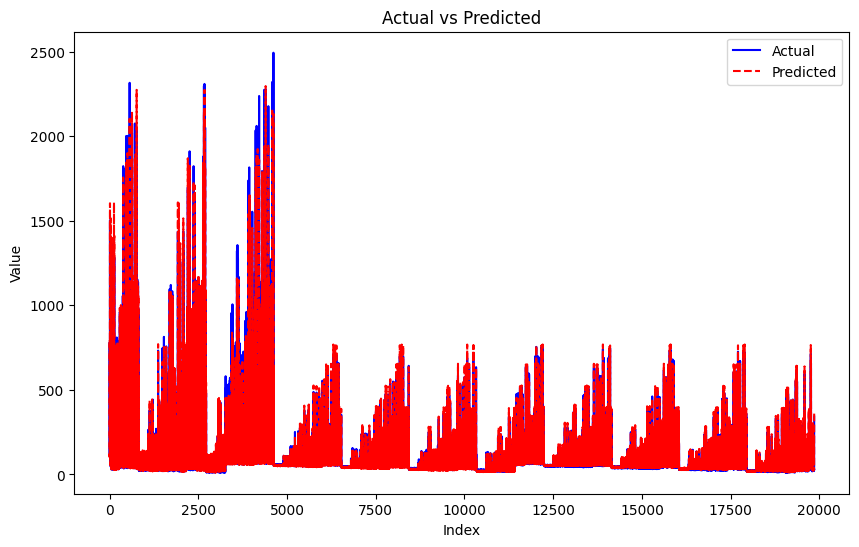

In [756]:
plt.figure(figsize=(10, 6))
plt.plot(list(y_test), label='Actual', color='blue')
plt.plot(list(y_pred), label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [757]:
fi = random_forest.feature_importances_
df_fi = pd.DataFrame(list(X_train.columns), columns = ['Columns'])
df_fi['Feature Importance'] = fi
df_fi.sort_values('Feature Importance', ascending = False, inplace = True)
df_fi

,Columns,Feature Importance
1,Population,0.332030
9,Promotion Type,0.230752
17,DayOfWeek,0.200341
8,Product Category,0.092490
10,Year,0.027112
4,Rainfall,0.017638
15,Day,0.016874
7,Inflation Rate,0.014004
18,DayOfYear,0.011679
16,Is_Weekend,0.011142


## XG Boost

In [758]:
xgb_params = {
    'n_estimators': 10,
    'objective': 'reg:squarederror',
    'random_state': 42
}
xgb_model = XGBRegressor(**xgb_params)
xgb_model.fit(X_train, y_train)
# Step 4: Evaluate Model Performance
y_pred = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred)
print("R-squared (R2) Score for XGBoost:", r2_xgb)

R-squared (R2) Score for XGBoost: 0.93114419184989


## Final Model

In [759]:
X_train = df_sales_aggr_ml.drop(columns=[predict_column, date_column])
y_train = df_sales_aggr_ml[predict_column]

if r2_rf > r2_xgb:
    model = 'Random Forest'
    # random_forest = RandomForestRegressor(random_state=42)
    # random_forest.fit(X_train, y_train)
    final_model = random_forest
    r2 = r2_rf
else:
    model = 'XGBoost'
    # xgb_model = XGBRegressor(**xgb_params)
    # xgb_model.fit(X_train, y_train)
    final_model = xgb_model
    r2 = r2_xgb


## Validation

In [760]:
y_pred = list(final_model.predict(X_test))
y_test = list(y_test)

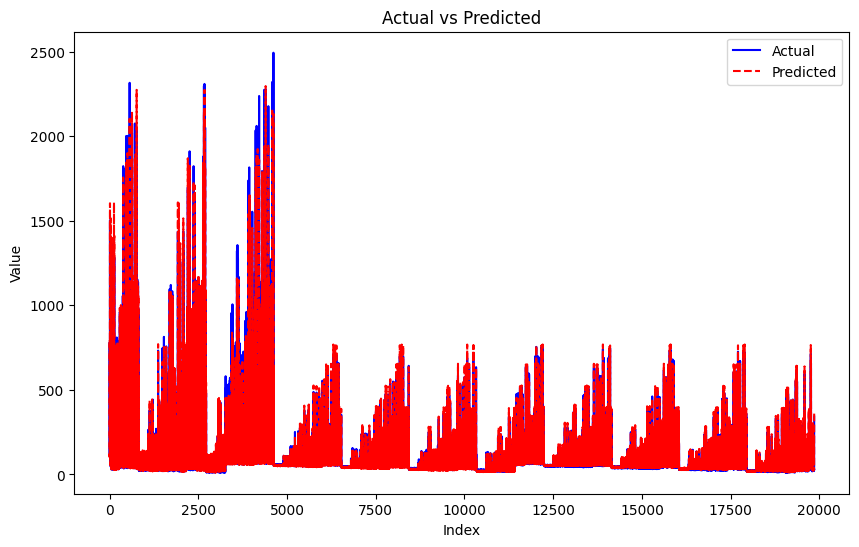

In [761]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

## Save model

In [762]:
import joblib
joblib.dump(final_model, 'final_model_contoso_modified.pkl')
joblib.dump(label_encoders, 'label_encoders_contoso_modified.pkl')

['label_encoders_contoso_modified.pkl']

## Predict Soothe

In [763]:
# Continent = 'Asia'
# ProductSubcategoryName = 'Recorder'
# ProductCategoryName = 'Audio'
# Country = 'India'
# start_date = '2023-04-05'
# end_date = '2023-08-05'

# actual_df = df_factsales[(df_factsales['Continent'] == 'Asia') & (df_factsales['ProductSubcategoryName'] == 'Recorder') & (df_factsales['ProductCategoryName'] == 'Audio') & (df_factsales['Country'] == 'India') & (df_factsales['Invoice date'] >= start_date) & (df_factsales['Invoice date'] <= end_date)][[date_column, predict_column]]
# actual_df = actual_df.groupby(date_column)[[predict_column]].sum().reset_index()

# date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# input_data = pd.DataFrame({
#     'Continent': [Continent] * len(date_range),
#     'ProductSubcategoryName': [ProductSubcategoryName] * len(date_range),
#     'ProductCategoryName': [ProductCategoryName] * len(date_range),
#     'Country' : [Country] * len(date_range),
#     'Date': date_range
# })

# for col in ['Continent', 'ProductSubcategoryName', 'ProductCategoryName', 'Country']:
#     input_data[col] = label_encoders[col].transform(input_data[col])

# input_data['Date'] = pd.to_datetime(input_data['Date'])
# input_data = extract_date_components(input_data, 'Date')
# input_data.drop(['Date'], axis = 1, inplace = True)

# predictions  = final_model.predict(input_data)
# result_df = pd.DataFrame({
#     'Date': date_range,
#     'Prediction': predictions
# })

## Predict contoso Modified

In [764]:
folder = '../Data/Synthetic/'
df_state_metric = pd.read_csv(os.path.join(folder, 'state_metric.csv'))
df_monthwise_metric = pd.read_csv(os.path.join(folder, 'monthwise_metric.csv'))

In [765]:
State = 'TN'
Category = 'Computers'
# Promotion = 'Festive Sale'
Promotion = 'No Promotion'
start_date = '2023-04-05'
end_date = '2023-08-05'

# actual_df = df_factsales[(df_factsales['State'] == State) & (df_factsales['Product Category'] == Category) & (df_factsales['Date'] >= start_date) & (df_factsales['Date'] <= end_date)][[date_column, predict_column]]
# actual_df = actual_df.groupby(date_column)[[predict_column]].sum().reset_index()

date_range = pd.date_range(start=start_date, end=end_date, freq='D')

input_data = pd.DataFrame({
    'State': [State] * len(date_range),
    'Product Category': [Category] * len(date_range),
    'Promotion Type': [Promotion] * len(date_range),
    'Date': date_range
})

input_data = pd.merge(input_data, df_state_metric, on = ['State'])

for col in ['State', 'Product Category', 'Promotion Type']:
    input_data[col] = label_encoders[col].transform(input_data[col])

input_data['Date'] = pd.to_datetime(input_data['Date'])
input_data = extract_date_components(input_data, 'Date')
input_data.drop(['Date'], axis = 1, inplace = True)

input_data = pd.merge(input_data, df_monthwise_metric[['Month', 'Money Supply M0', 'Money Supply M1', 'Inflation Rate']], on = ['Month'])

input_data = input_data[['State', 'Population', 'Average High Temp', 'Average Low Temp',
       'Rainfall', 'Money Supply M0', 'Money Supply M1', 'Inflation Rate',
       'Product Category', 'Promotion Type', 'Year', 'Quarter', 'Month', 'Week', 'WeekOfMonth',
       'Day', 'Is_Weekend', 'DayOfWeek', 'DayOfYear', 'is_start_of_month',
       'is_end_of_month', 'season', 'is_holiday']]

predictions  = final_model.predict(input_data)
input_data['Prediction'] = predictions
result_df = pd.DataFrame({
    'Date': date_range,
    'Prediction': predictions
})
result_df = result_df.set_index('Date')

C:\Users\venkatasalam\AppData\Local\Temp\ipykernel_3624\2299006587.py:53: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_sales.loc[df_sales[date_column].isin(holidays_list), 'is_holiday'] = 1


In [766]:
actual_df = df_factsales[(df_factsales['State'] == State) & (df_factsales['Product Category'] == Category) & (df_factsales['Date'] >= start_date) & (df_factsales['Date'] <= end_date)][[date_column, predict_column]].set_index('Date')
merged_df = actual_df.join(result_df, how='outer')

## Plot

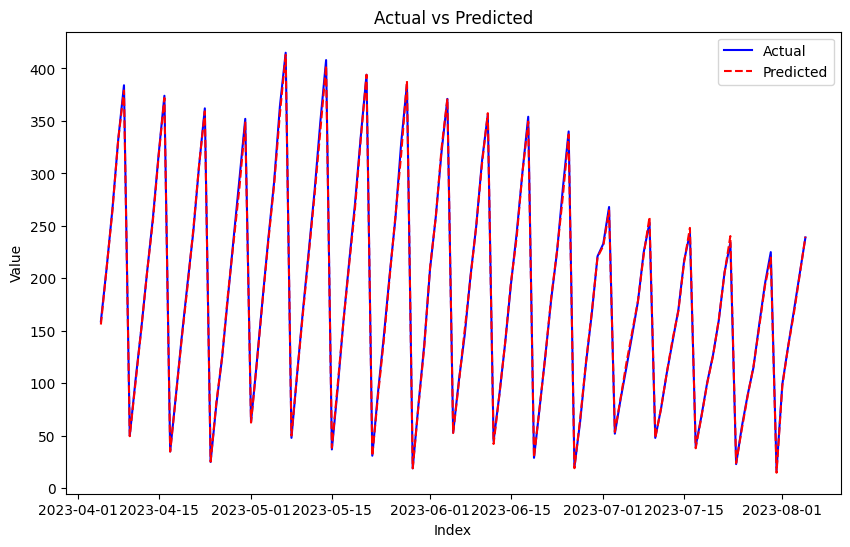

In [767]:
plt.figure(figsize=(10, 6))
plt.plot(actual_df[predict_column], label='Actual', color='blue')
plt.plot(result_df['Prediction'], label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

## Forecast Plot

In [626]:
# # Plot the chart
# X_future[date_column] = pd.to_datetime(X_future[['Year', 'Month', 'Day']])
# X_future[predict_column] = y_future
# plot_future = X_future.set_index(date_column)[predict_column]

# X_train[date_column] = pd.to_datetime(X_train[['Year', 'Month', 'Day']])
# X_train[predict_column] = y_train
# plot_train = df_sales_aggr_ml.set_index(date_column)[predict_column]

# plot_data = pd.concat([plot_train, plot_future])
# plot_data /= 1e6
# plot_data.index = pd.to_datetime(plot_data.index)
# # Find peaks
# # peaks, _ = find_peaks(plot_data.values, prominence=10)  # You can adjust the prominence as needed

# # plt.figure(figsize=(10, 6))
# sns.lineplot(data=plot_data, color='skyblue', label='Train Data')
# sns.lineplot(data=plot_future/1e6, color='salmon', label='Future Data')

# # # Adding data labels to peaks
# # for peak in peaks:
# #     date = plot_data.index[peak]
# #     value = plot_data.iloc[peak]
# #     plt.text(date, value, f'{value:.1f} M', color='black', fontsize=8, ha='center', va='bottom')

# # plt.plot(plot_data.index[peaks], plot_data.values[peaks], marker='o', markersize=5, color='grey', linestyle='None')

# plt.title(model + ' Forecast with Expected R2 Score = ' +  str(round(r2, 3)))
# plt.xlabel(date_column)
# plt.ylabel(predict_column)
# plt.xticks(rotation=45)
# plt.grid(True)  # Add grids
# plt.tight_layout()
# plt.legend()
# plt.show()